The project is based on the Classification of IRIS flowers by using the IRIS dataset from https://archive.ics.uci.edu/ml/datasets/Iris. 

Note: In this project I will be implementing six machine learning models and choose the one providing most accurate results.

Step 1: 
Loading neccesary Libraries.
Important libraries: Pandas, Numpy, Matplotlib, sklearn.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import numpy as np 
from pandas.plotting import scatter_matrix 
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Step 2: Loading dataset in variable name "data" 

Note: Dataset is already saved in my Python path which I downloaded from the above link.

In [4]:
data = pd.read_csv("iris-with-answers.csv")

Step 3A: Exploratory Data Analysis 
--Summarizing the Dataset

Note: I'll try to explore dataset in this section

In [5]:
#Dimensions of the dataset 
data.shape

#Dataset has 150 rows and 5 columns 

(150, 5)

In [6]:
#Getting a glimpse of dataset
data.head()

#Dataset column names are sepal_length, sepal_width, petal_length, pethal_width, and species.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#Statistical summary of its four numeric attributes 
data.describe()

#All values are between range 0.1 to 8 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Breakdown of the data by its class variable 
data.groupby('species').size()

#There are three groups and all have fifty attributes. 

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Step 3B: Exploratory Data Analysis -- Data Visualization

Note: I'll try to visualize data and explore hidden patterns 

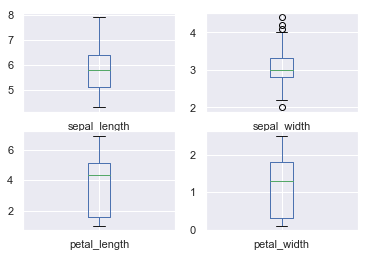

In [7]:
#Univariate Plots 
#Box and Wisker Plot
data.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey=False)
plt.show()

#It can be seen that sepal_width has a lots of outliers. 

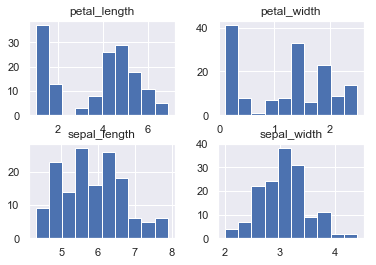

In [9]:
#Univariate Plots 
#Histogram 
data.hist()
plt.show()

#sepal_length is looking like a normal distribution 

<Figure size 1296x1080 with 0 Axes>

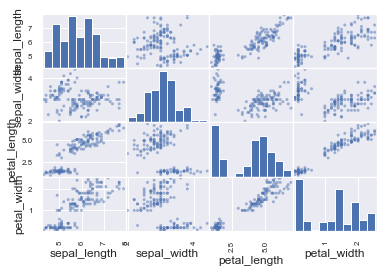

In [13]:
#Multivariate Plots 
#Scatter Plot Matrix 
plt.figure(figsize = (18, 15))
scatter_matrix(data)
plt.show()

#The following matrix shows the structured relationships between input variables
#Additionally the diagnol grouping of some pair of attributes shows high corellation

Step 4: Evaluating Algorithims 

In [4]:
#Creating Feature Matrix 
array = data.values 
X = array[:, 0:-1]
Y = array[:, -1]

In [10]:
#Splitting Dataset
#Dataset will be in 80:20 ratio
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [11]:
#Test Harness -- 10 fold cross validation
seed = 7 
scoring = 'accuracy'

#We are using the metric of 'accuracy' to evaluate models. This will yield a percentage when the results were correctly predicted. 

In [28]:
#Building Model
#Evaluation is based on 6 classification techniques 
#Linaer Techniques = Logistic Regression, Linear Discriminant Analysis 
#Non Linear Techniques = K-Nearest Neighbors, Classification and Regression Tree, Gaussian Naive Bayes and Support Vector Machines
models = []
models.append(('LR:', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA:', LinearDiscriminantAnalysis()))
models.append(('KNN:', KNeighborsClassifier()))
models.append(('CART:', DecisionTreeClassifier()))
models.append(('NB:', GaussianNB()))
models.append(('SVM:', SVC(gamma = 'auto')))

In [29]:
#Evaluating Models 
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
    
#SVM has the largest estimated accuracy rate

LR:: 0.966667 (0.040825)
LDA:: 0.975000 (0.038188)
KNN:: 0.983333 (0.033333)
CART:: 0.975000 (0.038188)
NB:: 0.975000 (0.053359)
SVM:: 0.991667 (0.025000)


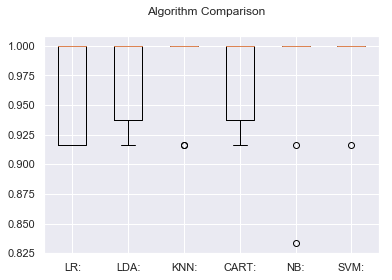

In [26]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Since, box and whisker plots are squashed at the top of the range, many samples are achieving 100% accuracy.

Step 5: Make Prediction

In [27]:
#Making predictions on test dataset 
#KNN accuracy is over 98%
#Implementing KNN on test dataset 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Conclusion: 
The accuracy of KNN on testing data is 0.9 or 90%. There are three errors which are presented in confusion matrix. 

Finally, the classification report provides a breakdown of each class by precision, recall, F1-Score, and support showing excellent results. 